# 인공지능 과제 #1 
# 탐색적 데이터 분석과 시각화

## Q1. TITANIC 데이터의 변수의 이름과 각 변수의 사례수, 데이터 형 출력

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 타이타닉 데이터 불러오기
# 1데이터 변수 정보 출력

df = sns.load_dataset(('titanic'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [4]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# 데이터의 상위 5행을 출력
pd.set_option('display.max_columns', None)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Q3. 열 이름과 각 열의 데이터 타입

survived
0    549
1    342
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


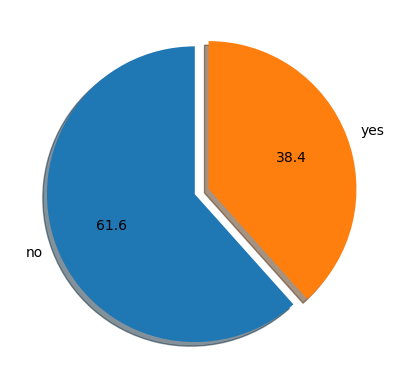

In [7]:
# 생존자와 사망자 사례수
print(df['survived'].value_counts())
print(df['alive'].value_counts())

# 생존여부 구성비 (원그래프)
plt.pie(df['alive'].value_counts(), labels = ['no', 'yes'], explode = (0, 0.1)\
        , startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 이 그래프는 생존한 승객과 생존하지 못한 승객의 비율을 보여줍니다. 다음 단계로는 성별, 객실 등급, 나이, 승선 도시와 같은 주어진 다른 특성과 생존률 간의 관계를 살펴볼 것입니다.

### 이러한 특성들이 생존에 어떤 영향을 미치는지 보기 전에, 각 특성을 하나씩 먼저 살펴보겠습니다. 먼저 성별부터 시작하겠습니다.

sex
male      577
female    314
Name: count, dtype: int64


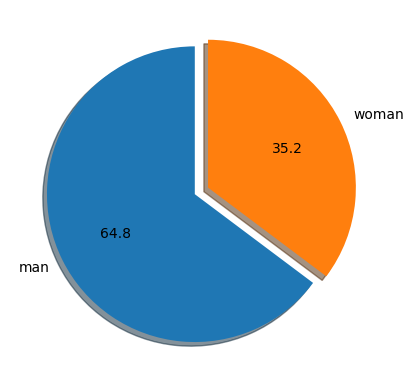

In [9]:
# 성별 사례수
print(df['sex'].value_counts())

# 성별 구성비
plt.pie(df['sex'].value_counts(), labels = ['man', 'woman'], explode = (0, 0.1)\
       , startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 다음으로는 좀 더 깊이 살펴보겠습니다. 전체 승객 수를 성별로 나누어 보되, 이번에는 16세 이하 승객을 따로 구분하여 나이가 생존 여부에 영향을 미쳤는지 확인해 보겠습니다.

who
man      537
woman    271
child     83
Name: count, dtype: int64


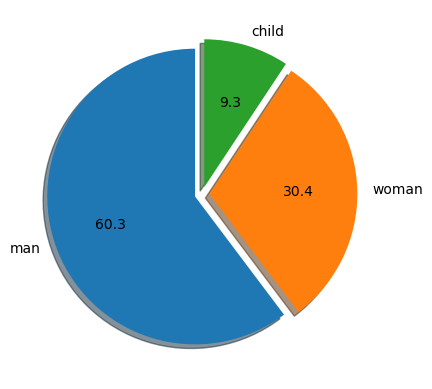

In [11]:
#  성별과 아동 사례수
print(df['who'].value_counts())

# 성별과 아동 구성비
plt.pie(df['who'].value_counts(), labels = ['man', 'woman', 'child'], explode = (0.05, 0.05, 0.05)\
       , startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 이제 승선 도시(또는 출발 국가)별로 승객 수를 살펴보겠습니다.

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


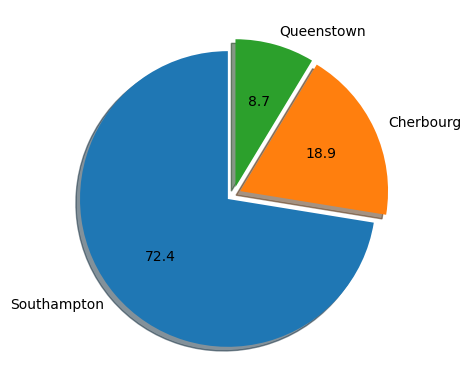

In [13]:
# 도시별(국가별) 탑승인원 사례수
print(df['embark_town'].value_counts())

# 도시별(국가별) 탑승인원 구성비
plt.pie(df['embark_town'].value_counts(), labels = ['Southampton', 'Cherbourg', 'Queenstown']\
        , explode = (0.05 , 0.05, 0.05), startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 승객이 탑승한 국가나 도시가 생존 확률에 영향을 미쳤는지 살펴보겠습니다.

### 이제 1등석 승객이 3등석 승객보다 생존 확률이 더 높았는지 알아보겠습니다. 하지만 그 전에, 각 객실 등급별 승객 수를 먼저 확인해 보겠습니다.

class
Third     491
First     216
Second    184
Name: count, dtype: int64


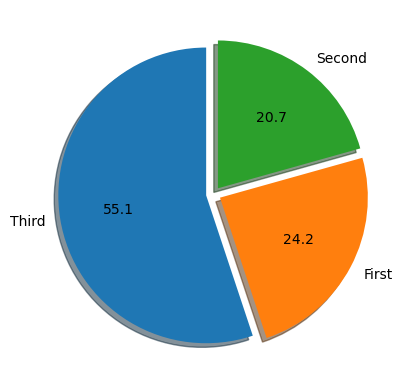

In [15]:
# 객실 등급별 탑승인원 사례수
print(df['class'].value_counts())

# 객실 등급별 탑승인원 구성비
plt.pie(df['class'].value_counts(), labels = ['Third', 'First', 'Second'], explode = (0.05, 0.05, 0.05)\
       , startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 이제 ‘alone’이라는 불리언(참/거짓) 특성을 통해 혼자인지, 동행자가 있는지가 생존 확률에 영향을 미쳤는지 살펴보겠습니다.

alone
True     537
False    354
Name: count, dtype: int64


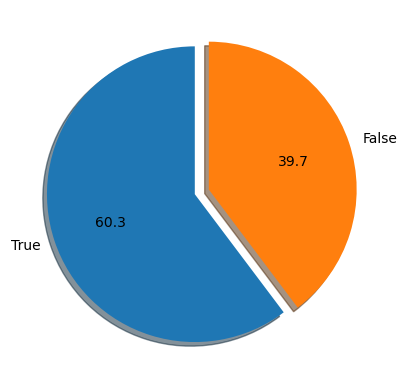

In [17]:
# 혼자 탑승한 인원 사례수
print(df['alone'].value_counts())

# 객실 등급별 탑승인원 구성비
plt.pie(df['alone'].value_counts(), labels = ['True', 'False'], explode = (0, 0.1)\
       , startangle = 90, shadow = True, autopct = '%.1f')
plt.show()
print('\n')

### 승객의 나이와 요금 분포를 시각화하기 위해 히스토그램을 사용해 보겠습니다

Text(0.5, 1.0, 'Fare Distribution')

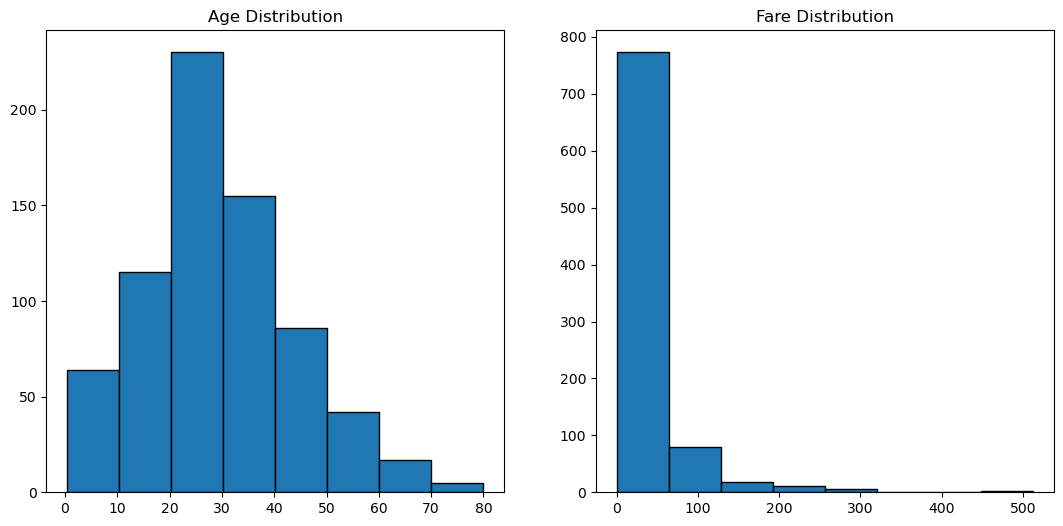

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))
# 나이 분포
ax[0].hist(df['age'], bins = 8, edgecolor = 'k')
ax[0].set_title('Age Distribution')
# 요금 분포
ax[1].hist(df['fare'], bins = 8, edgecolor = 'k')
ax[1].set_title('Fare Distribution')

### 위의 히스토그램을 보면, 20세에서 30세 사이의 승객이 매우 많았고, 대부분의 승객은 100유로 이하의 요금을 지불한 것으로 보입니다.

<Axes: xlabel='sex', ylabel='count'>

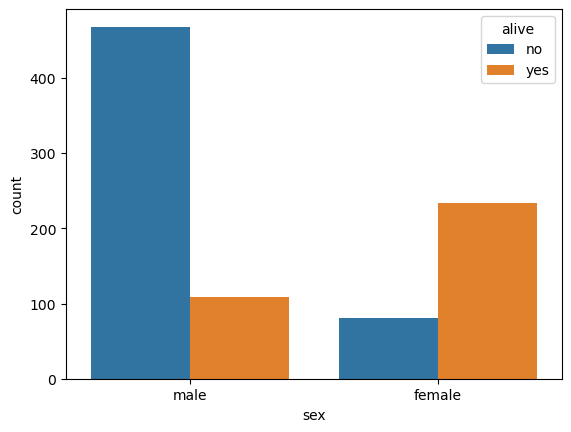

In [21]:
# 객실 등급별 생존자 수와 생존율의 비교
sns.countplot(data=df, x='sex', hue='alive')

### 위의 카운트플롯을 보면, 생존하지 못한 승객의 대부분은 남성이었고, 생존한 승객의 대부분은 여성이었습니다.
### 이는 성별과 생존률 사이에 잠재적인 상관관계가 있을 수 있음을 시사합니다.

class  First      Second       Third       All
sex   female male female male female male     
alive                                         
no         3   77      6   91     72  300  549
yes       91   45     70   17     72   47  342
All       94  122     76  108    144  347  891


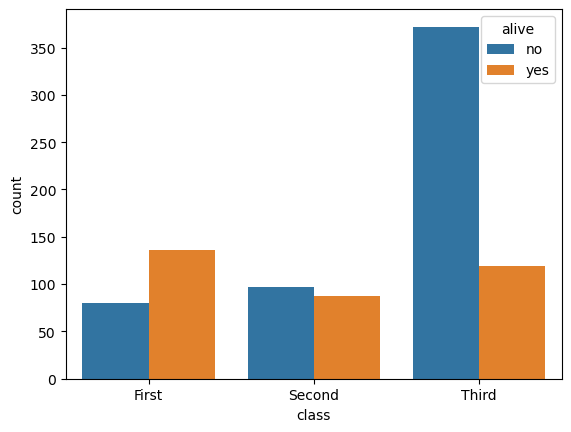

In [23]:
#객실 등급별 생존자 수와 생존율의 비교
sns.countplot(data=df, x='class', hue='alive')
table = pd.crosstab(index=[df['alive']],  # 객실 등급
                    columns=[df['class'], df['sex']],  # 성별과 생존 여부
                    margins=True)  # 총합 추가

print(table)

### 다른 객실 등급과 비교했을 때, 1등석 승객의 생존 확률이 가장 높았고, 3등석 승객은 가장 낮았습니다. 이는 객실 등급이 높을수록 생존 확률도 높아지는 경향이 있음을 보여줍니다. 하지만 흥미로운 점은 2등석 승객의 수로, 이 또한 추가적인 통찰을 제공할 수 있습니다.

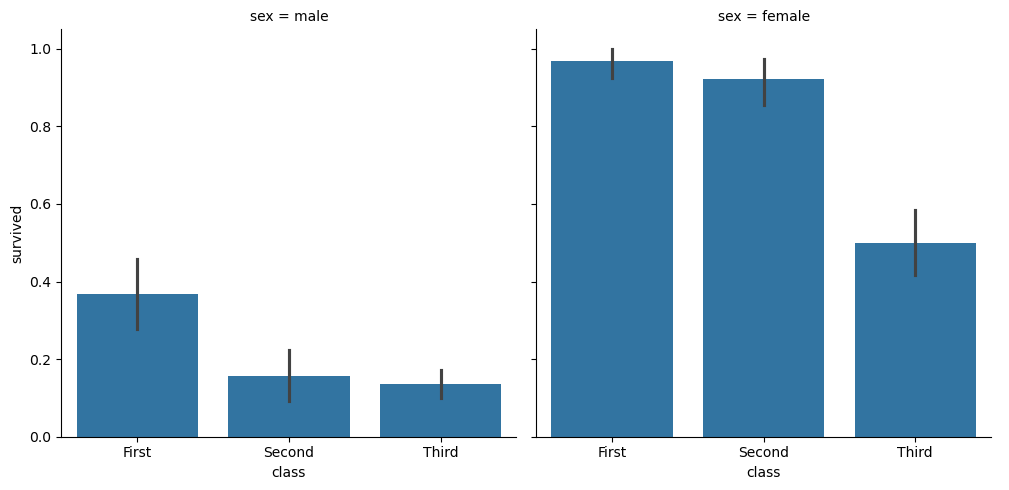

In [25]:
# 객실 등급별 생존자 수와 생존율의 비교
sns.catplot(df, x = 'class', y = 'survived', col = 'sex', kind = 'bar', height = 5, aspect = 1)
plt.tight_layout()
plt.show()

### 앞서 언급했듯이, 여성 승객은 남성 승객보다 생존 확률이 높았습니다. 위 그래프에서는 성별에 따른 객실 등급별 생존률을 확인할 수 있습니다. 특히 1등석 여성 승객은 거의 100%에 가까운 생존률을 보이며, 등급이 낮아질수록 그 생존률도 점점 낮아지는 것을 확인할 수 있습니다.

### 그래프의 남성 승객 부분에서도 동일한 패턴을 볼 수 있지만, 생존률은 눈에 띄게 낮습니다.

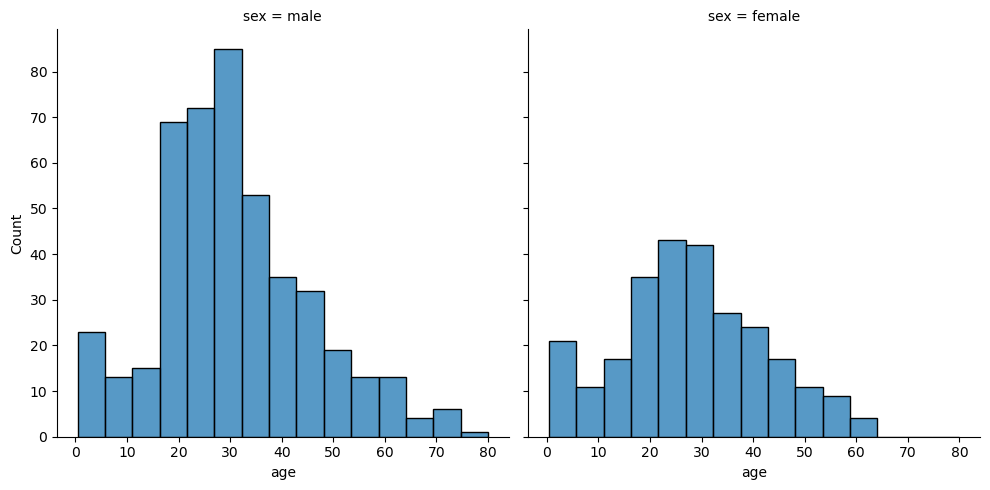

In [28]:
# 성별에 따른 나이분포
sns.displot(data = df, x = 'age', col = 'sex', bins = 15)
plt.tight_layout()
plt.show()

### 위의 차트를 보면, 먼저 남성과 여성 승객의 나이를 기준으로 승객 수를 살펴보았습니다. 그래프에 따르면 전반적으로 여성보다 남성 승객이 더 많았습니다. 남성 승객은 대부분 20세에서 35세 사이였으며, 30세 남성이 가장 많은 것으로 나타났습니다. 가장 나이가 많은 남성 승객은 80세였습니다.
### 여성 승객도 비슷한 양상을 보였으며, 대부분 20세에서 35세 사이였습니다. 또한, 10세 미만의 어린아이 승객 수도 상당히 많았습니다.

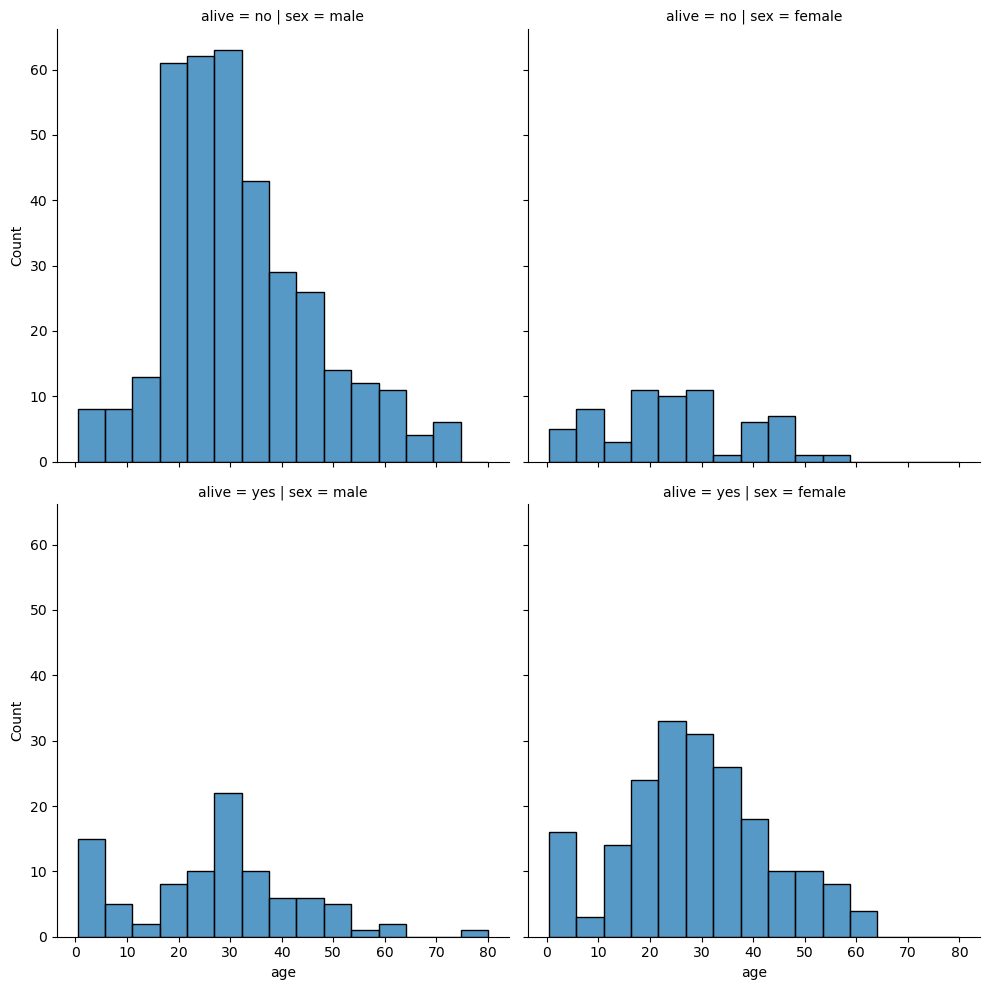

In [31]:
# 성별, 생존여부에 따른 나이 분포
sns.displot(data = df, x = 'age', row = 'alive', col = 'sex', bins = 15)
plt.tight_layout()
plt.show()

### 이제 나이, 성별, 생존 여부와 관련된 패턴이 있는지 더 자세히 살펴보겠습니다. 생존하지 못한 승객 중 대부분은 20대에서 40대 초반의 남성이었습니다. 반면, 생존하지 못한 여성 승객의 경우에는 뚜렷한 패턴이 보이지 않습니다.
### 생존한 승객을 보면, 대부분이 여성이라는 점이 분명하게 드러납니다. 나이 분포 차트에서도 연령별 승객 수가 유사한 패턴을 보이고 있으며, 이는 이 결과와 일치합니다. 특히 남성 승객 중에서는 어린이들이 상대적으로 높은 생존률을 보인 것이 눈에 띕니다.

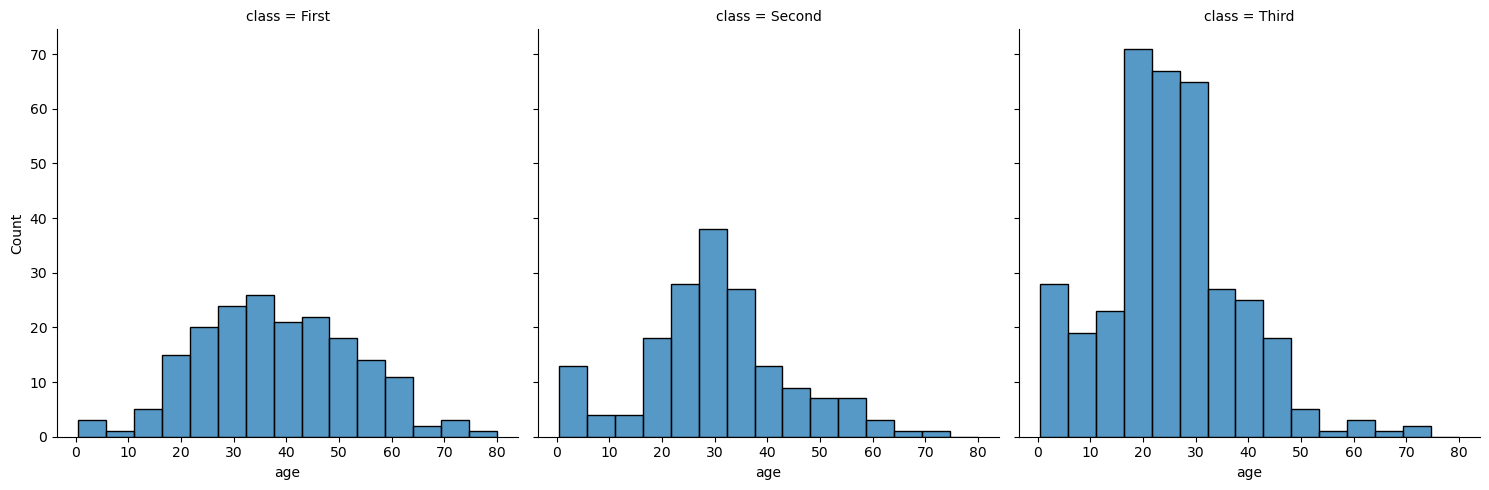

In [34]:
# 객실 등급별 나이 분포
sns.displot(data = df, x = 'age', col = 'class', bins = 15)
plt.tight_layout()
plt.show()

### 위의 그래프를 보면, 대부분의 승객이 3등석을 이용했으며, 특히 15세에서 30세 사이의 승객이 많았습니다. 반면 1등석 승객은 연령대가 더 넓게 분포되어 있으며, 최대 80세에 이르는 승객도 있습니다. 이는 3등석이 젊고 상대적으로 저소득층 승객에게 더 인기가 있었던 반면, 1등석은 나이가 많고 경제적으로 여유 있는 승객들에게 더 매력적이었을 가능성을 시사합니다.

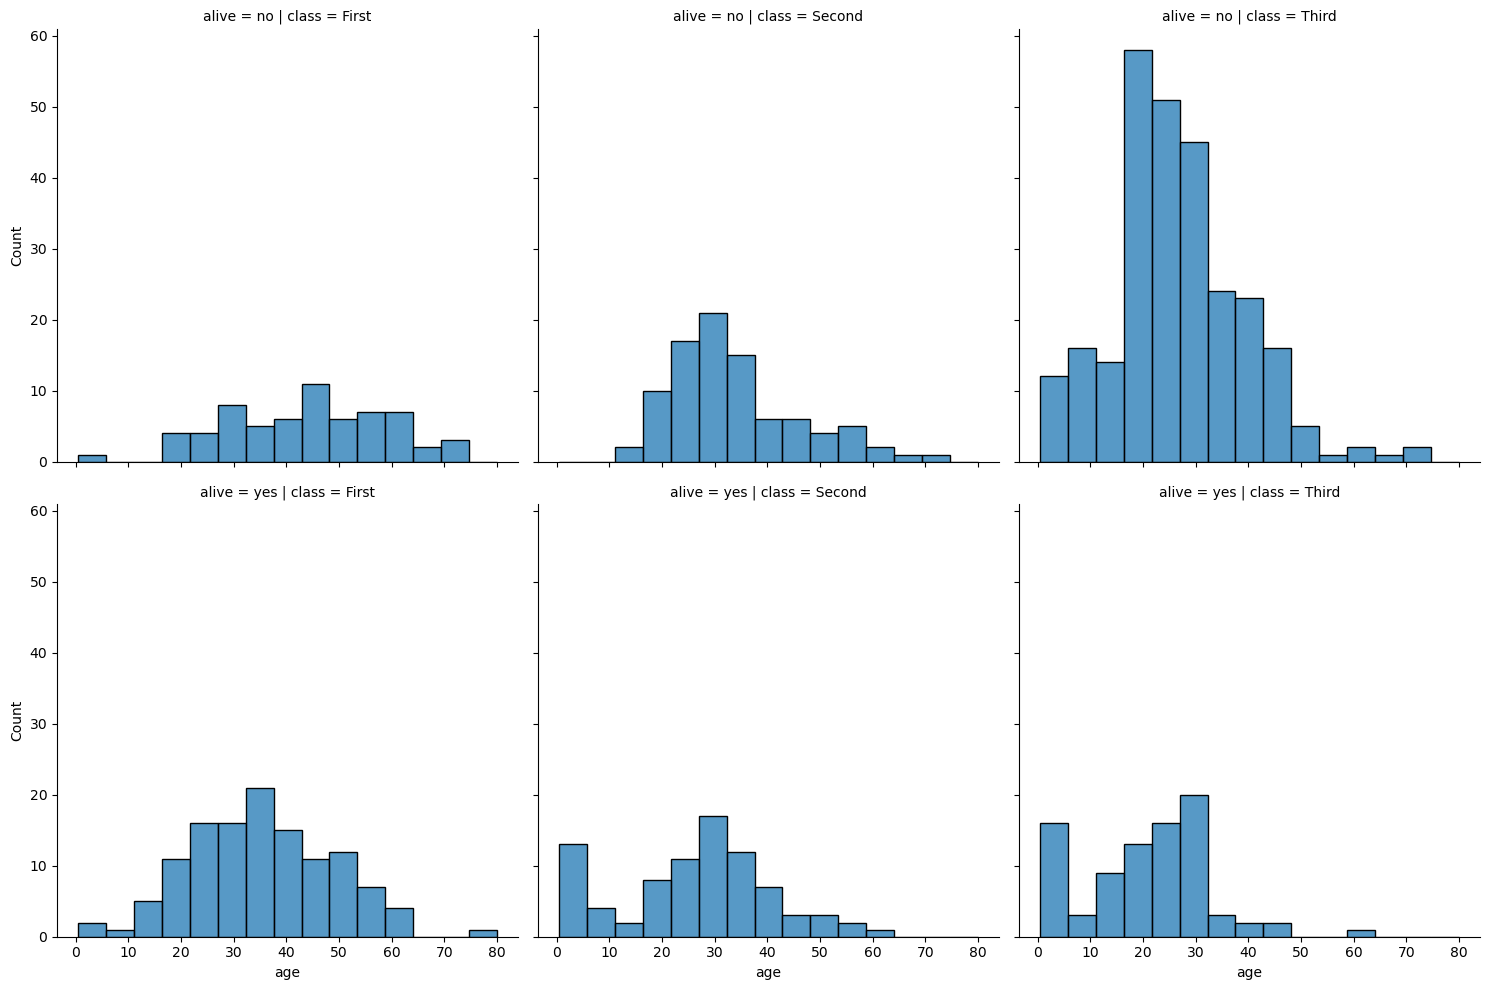

In [37]:
# 객실 등급별 생존여부에 따른 나이 분포
sns.displot(data = df, x = 'age', row = 'alive', col = 'class', bins = 15)
plt.tight_layout()
plt.show()

### 위의 그래프를 보면, 생존하지 못한 승객 중 대부분이 3등석에 속해 있었으며, 이는 저소득층이자 젊은 승객들의 생존 확률이 더 낮았음을 시사합니다. 3등석에서도 일부 생존자는 있었지만, 주로 30세 전후의 젊은 승객들이었습니다.

### 반면, 1등석 승객은 더 높은 생존률을 보였습니다. 생존하지 못한 승객을 보여주는 그래프에서는 1등석 승객의 수가 눈에 띄게 적은 반면, 생존한 승객을 보여주는 그래프에서는 그 수가 더 많습니다. 1등석에서 생존한 승객은 주로 20세에서 50세 사이의 연령대에 집중되어 있었습니다.

<Axes: xlabel='embark_town', ylabel='count'>

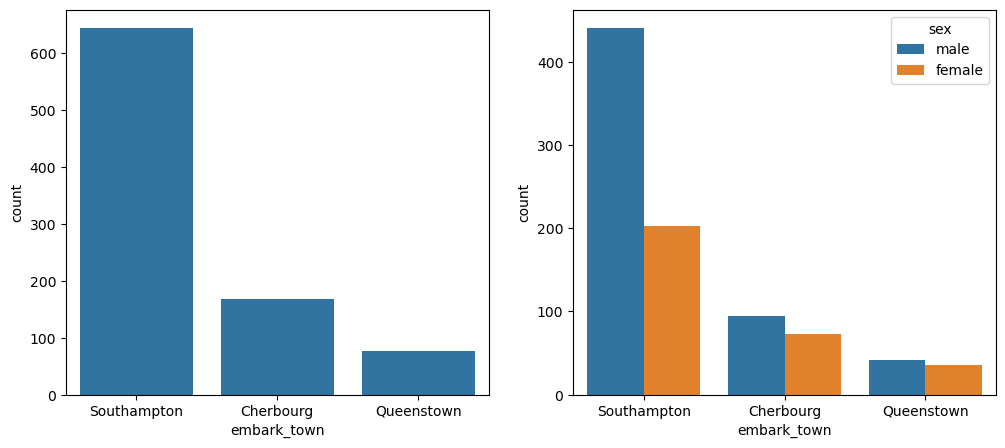

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# 도시별 탑승 인원
sns.countplot(data=df, x='embark_town', ax = ax[0])
# 도시별 성별 탑승 인원
sns.countplot(data=df, x='embark_town', hue = 'sex', ax = ax[1])

### 대부분의 승객은 사우샘프턴(Southampton)에서 탑승했습니다. 특히, 사우샘프턴은 남성과 여성의 비율 차이가 가장 크게 나타났습니다. 반면 셰르부르(Cherbourg)와 퀸스타운(Queenstown)은 성별 분포가 더 균형 잡혀 있었습니다.

<Axes: xlabel='embark_town', ylabel='count'>

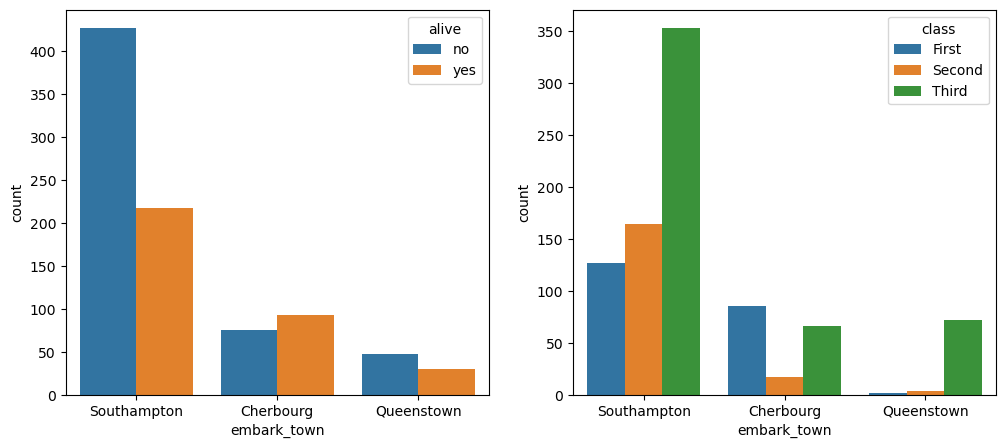

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# 도시별 생존여부
sns.countplot(data=df, x='embark_town', hue = 'alive',  ax = ax[0])
# 도시별 등급별 탑승 인원
sns.countplot(data=df, x='embark_town', hue = 'class', ax = ax[1])

### 성별과 도시별 객실 등급 분포를 함께 보면 더 구체적인 패턴을 확인할 수 있습니다. 사우샘프턴(Southampton) 출신 승객 대부분은 3등석에 있었지만, 1등석 승객도 상당수 존재했습니다. 셰르부르(Cherbourg)에서는 2등석 승객이 적었지만, 1등석과 3등석 사이의 분포는 더 균형 잡혀 있었습니다. 퀸스타운(Queenstown)에서는 3등석 승객이 집중적으로 많았는데, 이는 퀸스타운 출신 승객 중 다수가 저소득층일 가능성을 시사합니다. 결과적으로, 사우샘프턴에는 젊고 저소득층 승객뿐 아니라 부유한 1등석 승객들도 많이 탑승해 있었던 것으로 보입니다.

## 추가 분석

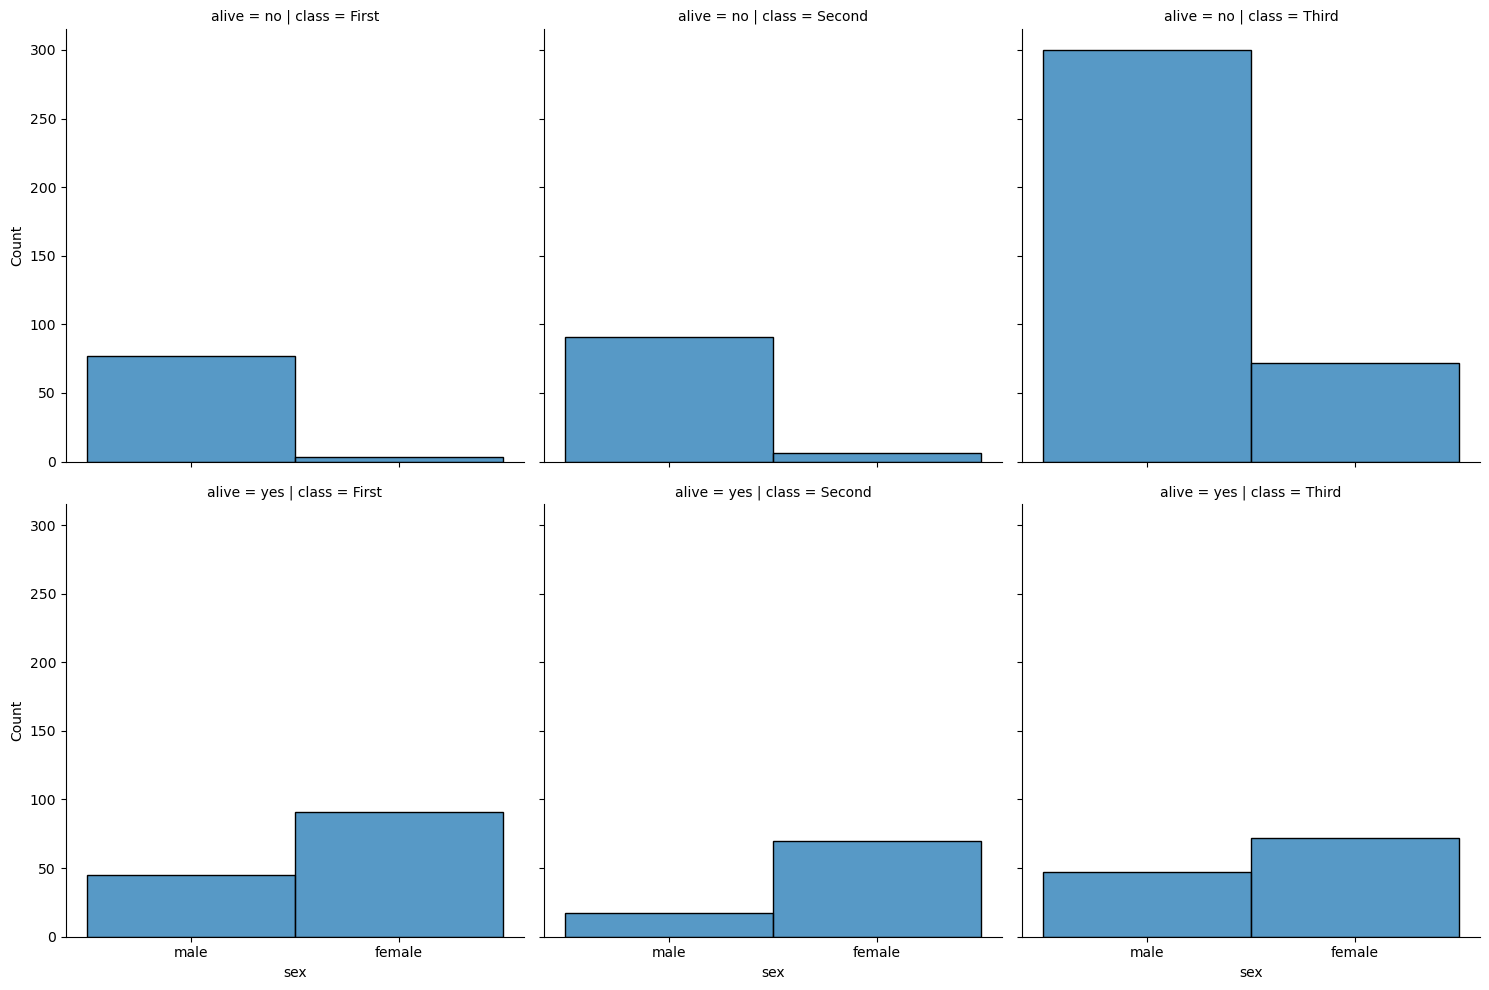

In [47]:
# 클래스별 남성 및 여성 승객 수와 생존 또는 생존 여부
sns.displot(data = df, x = 'sex', row = 'alive', col = 'class', bins = 15)

### EDA 결론

# 1. 전체적으로 생존율이 높은 순서로 정리하고 그 이유에 대한 의견을 작성하시오.
## 성별 기준:
### 여성 > 남성
### 여성의 생존률이 남성보다 현저히 높았습니다. 이는 "여성과 어린이 우선"이라는 해상 규칙 때문일 가능성이 큽니다. 특히 First class와 Second class의 여성 생존률은 매우 높았습니다.

## 객실 등급 기준:
### First class > Second class > Third class
### First class 승객의 생존률이 가장 높았습니다. 등급이 높을수록 구명보트에 더 쉽게 접근할 수 있었고, 대피 시 우선순위가 주어졌기 때문일 수 있습니다.

## 탑승 도시 기준:
### Cherbourg > Southampton > Queenstown
### Cherbourg 출신 승객은 First class 승객 비율이 높아 생존률도 가장 높았습니다. Southampton은 Third class 승객이 많지만, First class 승객도 상당히 있어 그 다음으로 높은 생존률을 보였습니다. Queenstown은 Third class 승객 비율이 가장 높아 생존률이 가장 낮았습니다.

## 연령 기준:
### 어린 승객 > 나이 든 승객
### 10세 미만의 어린이를 포함한 어린 승객의 생존률이 높았습니다. 반면, Third class에 속한 노년층 남성의 생존률은 가장 낮았습니다.

# 2. 여성 탑승자에 대해서 생존율이 높은 순서를 정리하시오.
### 1위: First class 여성 승객
### 여성이라는 점과 First class 승객이라는 점이 생존률을 높이는 주요 요인이었습니다.

### 2위: Southampton 출신 Second class 여성 승객
### 특히 어린이와 20~30대 초반의 젊은 여성들이 높은 생존률을 보였습니다.

### 3위: Queenstown 출신 Third class 여성 승객
### 이 그룹은 여성 중 생존률이 가장 낮았으며, 생존 확률이 약 50%로 나타났습니다.

# 3. 남성 탑승자에 대해서 생존율이 높은 순서를 정리하시오.
### 1위: First class 남성 승객 (Cherbourg 출신)
### 앞서 언급했듯이, Cherbourg에서 탑승한 승객들은 First class 승객의 비율이 높기 때문에 전반적인 생존률도 가장 높습니다. First class 승객들은 우선 순위가 부여되어 구명보트에 더 쉽게 접근할 수 있었기 때문에 생존률이 높습니다.

### 2위: First class 남성 승객 (Southampton 출신)
### 생존률이 두 번째로 높은 도시인 Southampton 출신의 First class 남성들이 다음 순위입니다. Southampton도 First class 승객이 많은 편이며, First class의 전반적인 생존률은 가장 높습니다.

### 3위: Second class 남성 승객
### Second class 남성들은 중간 정도의 생존률을 보였습니다. Third class보다는 생존률이 높았지만, 상당수는 여전히 생존하지 못했습니다.

### 4위: Third class 어린 남자아이 (15세 이하)
### Third class 승객 전반의 생존률은 낮지만, 어린 남자아이들은 예외적으로 높은 생존률을 보였습니다. 나이가 어릴수록 생존 가능성이 높아진다는 점이 반영된 결과입니다.

### 5위: 모든 도시 출신의 Third class 성인 남성
### 전반적으로 생존률이 가장 낮은 그룹으로, 탑승 도시와 상관없이 Third class의 성인 남성들은 생존 가능성이 매우 낮았습니다.

